# **Gender Disparities, Age, and Cholesterol Levels: Implications for Heart Disease Risk**
**DSCI 100 002 Group 4 Project Report**

Group member: Dayna Yoon, Xudong Ma, Danlin (Evelyn) Pu, Shrey Chordia

## **Introduction** 

Heart disease (cardiovascular disease) is a leading cause of death worldwide, with millions of lives lost each year. Early diagnosis of heart disease is crucial because it enables timely intervention and preventive measures, ultimately improving outcomes and quality of life for individuals affected by this condition. The fight against this pervasive health issue increasingly leverages data analysis to identify risk factors, improve diagnostic methods, and tailor treatments more effectively. Therefore, this project focuses on analyzing a heart disease dataset from the UCI Machine Learning Repository, by critical variables such as gender, age, and cholesterol level as predictors. 

"*In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is an integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).*" (Janosi et al., 1988)

**Can age, gender and cholesterol level collectively serve as predictors for identifying patients at high risk of cardiovascular disease?** 
We chose age, cholesterol level, and gender as variables for identifying heart disease because these factors significantly influence the likelihood of developing cardiovascular conditions. **Age** reflects the cumulative effect of aging on the cardiovascular system, **cholesterol levels** indicate lipid-related risk factors, and **gender** influences the timing and magnitude of heart disease risk.

For our research question, we use the 'Processed Cleveland' dataset. This dataset includes various variables obtained from 300 patients, including age (year), gender, cholesterol levels (mg/dl), and diagnostic outcomes.

This dataset has:
- Age
- Sex
- Location of pain
- Rest bps (Resting Heart Rate per Minute)
- Cholesterol Level (mg/dl)
- Maximum bpm (Max Heart Rate per Minute)
- Number of Diagnosis (diag_count, which means heart disease presence) 

## **Method**

First, we imported the necessary libraries and loaded the 'processed.cleveland.csv' dataset. This dataset contains information related to heart disease. Irrelevant columns are removed, and meaningful column names are assigned.

Next, we divided the data into training and testing sets. We utilized 75% of the data for training and the remaining 25% for testing. This allowed us to build models with sufficient data and evaluate their performance effectively.

This report calculates using 'summarize' statistics, such as the count of patients by age and the mean cholesterol level by diagnosis. After that, we visualize the distribution of age, cholesterol levels, and gender (sex) among normal people and heart disease patients by using Histogram. Also, we add dashed lines to indicate specific age values.

To check expected outcomes, we clean the data by replacing "?" values with NA. A new binary variable ('diagnosis') is created to indicate the presence or absence of heart disease based on the 'diag_count' column.

Subsequently, our primary objective was to determine the optimal value for k nearest neighbors. To achieve this, we created a classifier and performed cross-validation to split the training data and evaluate the model. During this process, we visualized the results to filter for accuracy and find the optimal k value.

With the optimal k value, we devised a new model specification and fitted the classifier to the training set. Then, we used the trained model to predict outcomes on the testing set to evaluate its performance. We assessed the model's accuracy and confusion matrix to gauge its performance.

Through this comprehensive process, we meticulously fine-tuned and improved the model for practical applications.

## Preliminary exploratory data analysis: ##

**Load the Packages**

In [29]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

**Read the Data**

**Note: the variable 'diag_count' is the presence of heart disease in the patients.**

In [30]:
heart_data <- read_csv("processed.cleveland.csv", col_names = FALSE) |>
select(X1, X2, X3, X4, X5, X8, X14)

colnames(heart_data) <- make.names(c("age", "sex", "pain_location", "restbps", "cholesterol", "maxbpm", "diag_count"))
heart_data


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,pain_location,restbps,cholesterol,maxbpm,diag_count
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,150,0
67,1,4,160,286,108,2
67,1,4,120,229,129,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,115,3
57,0,2,130,236,174,1
38,1,3,138,175,173,0


In [31]:
set.seed(9999)
heart_data_split <- initial_split(heart_data, prop = 0.75, strata = diag_count)
heart_data_training <- training(heart_data_split)
heart_data_testing <- testing(heart_data_split)

Summary statistics, such as the count of patients by age and the mean cholesterol level by diagnosis, are calculated using **summarize**.

In [32]:
number_of_patients_by_age <- heart_data_training |>
group_by(age) |>
summarize(parient_count = n())
number_of_patients_by_age

age,parient_count
<dbl>,<int>
34,2
35,4
37,2
⋮,⋮
74,1
76,1
77,1


In [33]:
mean_cholesterol <- heart_data_training |>
group_by(diag_count) |>
summarize(mean_cholesterol = mean(cholesterol, na.rm = TRUE))

print(mean_cholesterol)

# A tibble: 5 × 2
  diag_count mean_cholesterol
       <dbl>            <dbl>
1          0             245.
2          1             251.
3          2             262.
4          3             245.
5          4             275.


In [43]:
# we divided all people in this population into 
# "heart_disease_patients" and "normal_people"

normal_people<-heart_data|>
mutate(across(age:diag_count, as.integer))|>
filter(diag_count==0)

normal_people

heart_disease_patients<-heart_data|>
mutate(across(age:diag_count, as.integer))|>
filter(diag_count!=0)

heart_disease_patients

age,sex,pain_location,restbps,cholesterol,maxbpm,diag_count
<int>,<int>,<int>,<int>,<int>,<int>,<int>
63,1,1,145,233,150,0
37,1,3,130,250,187,0
41,0,2,130,204,172,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,0,2,132,342,166,0
41,1,2,120,157,182,0
38,1,3,138,175,173,0


age,sex,pain_location,restbps,cholesterol,maxbpm,diag_count
<int>,<int>,<int>,<int>,<int>,<int>,<int>
67,1,4,160,286,108,2
67,1,4,120,229,129,1
62,0,4,140,268,160,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,141,2
57,1,4,130,131,115,3
57,0,2,130,236,174,1


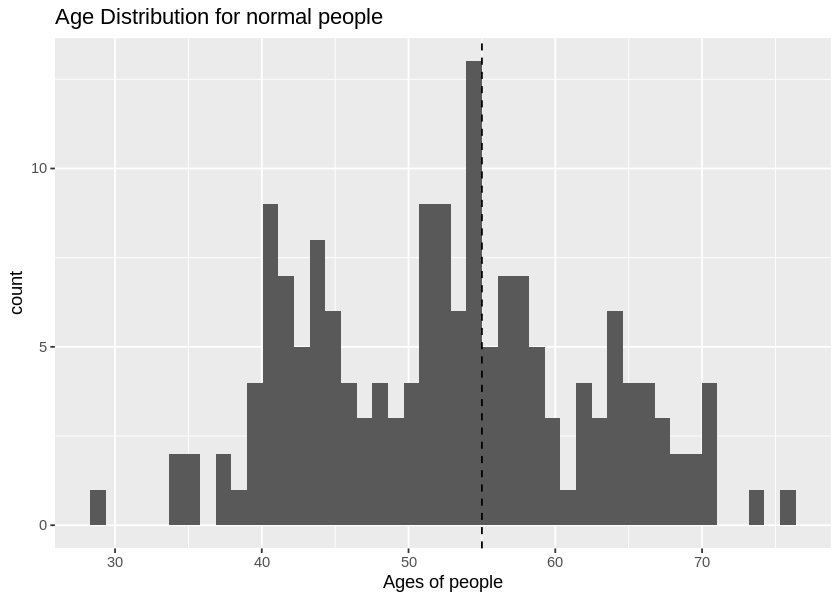

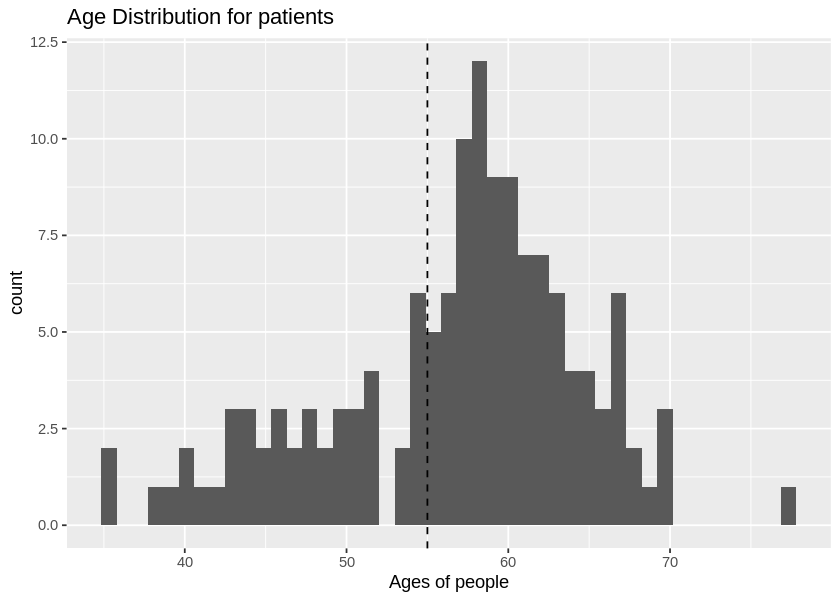

In [35]:
options(repr.plot.width = 7, repr.plot.height = 5)
histogram_age_normalpeople<-normal_people|>
ggplot(aes(x=age))+
geom_histogram(bins=45)+
geom_vline(xintercept=55,linetype="dashed")+
labs(x="Ages of people",title="Age Distribution for normal people")

histogram_age_normalpeople

histogram_age_patients<-heart_disease_patients|>
ggplot(aes(x=age))+
geom_histogram(bins=45)+
geom_vline(xintercept=55,linetype="dashed")+
labs(x="Ages of people",title="Age Distribution for patients")
histogram_age_patients


We can clearly find that "Age" is a significant factor leading to heart disease. As the age range increases, the number of heart disease patients significantly increases.

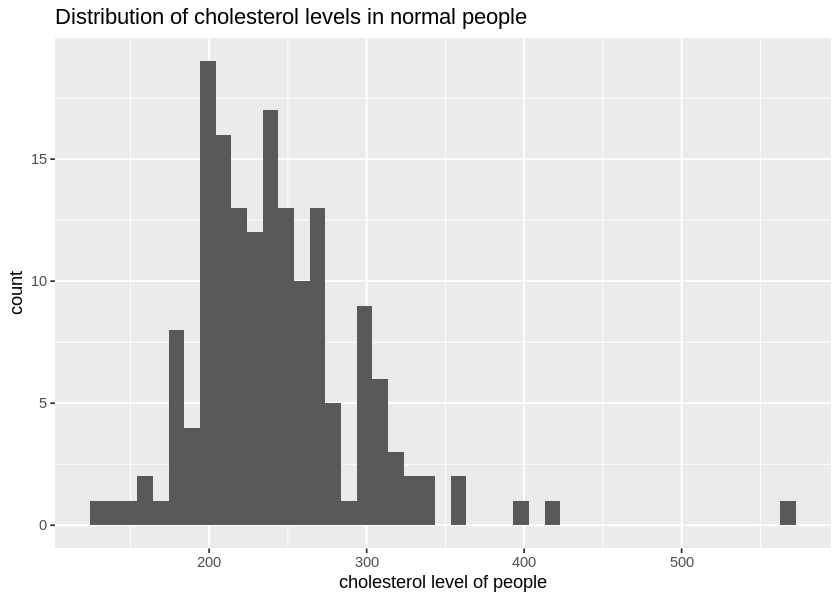

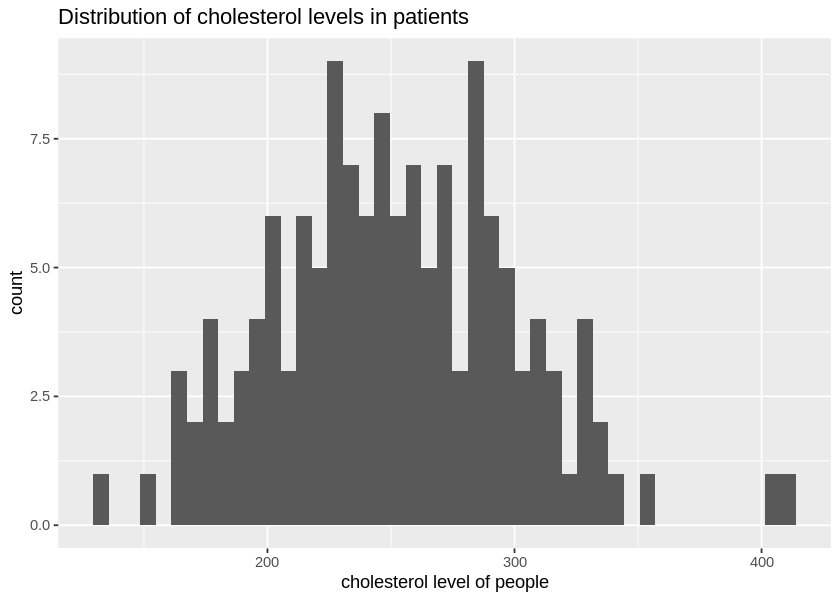

In [36]:
options(repr.plot.width = 7, repr.plot.height = 5)
histogram_cholesterol_normalpeople<-normal_people|>
ggplot(aes(x=cholesterol))+
geom_histogram(bins=45)+
labs(x="cholesterol level of people",title="Distribution of cholesterol levels in normal people")

histogram_cholesterol_normalpeople

histogram_cholesterol_patients<-heart_disease_patients|>
ggplot(aes(x=cholesterol))+
geom_histogram(bins=45)+
labs(x="cholesterol level of people",title="Distribution of cholesterol levels in patients")
histogram_cholesterol_patients

We can clearly find that "cholesterol level" is a significant factor leading to heart disease. 
In heart disease patients, a higher proportion of individuals have cholesterol levels between 200 and 300.


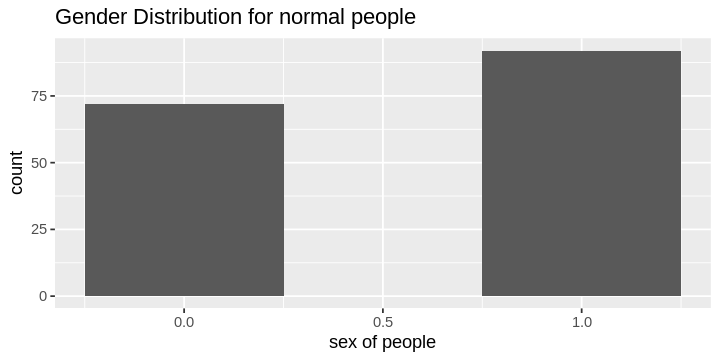

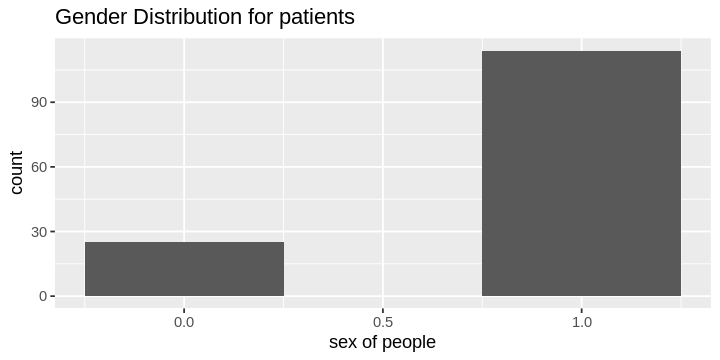

In [37]:
options(repr.plot.width = 6, repr.plot.height = 3)
histogram_sex_normalpeople<-normal_people|>
ggplot(aes(x=sex))+
geom_histogram(binwidth=0.5)+
labs(x="sex of people",title="Gender Distribution for normal people")

histogram_sex_normalpeople

histogram_sex_patients<-heart_disease_patients|>
ggplot(aes(x=sex))+
geom_histogram(binwidth=0.5)+
labs(x="sex of people",title="Gender Distribution for patients")
histogram_sex_patients

# “1”represents male ， “0” represents female

We can clear find that the percentage of patients are men is more higher. So gender also be a predictor variable.

#### **Expected outcomes and significance:**

**What do we expect to find?** 

We are expecting to find the relationship between the factors, such as a higher cholesterol level or aging resulting in a higher risk of heart disease. We are also expecting how much higher blood pressure, or sex affect to the risk of heart disease; breif data usually claims women more likely have higher risk of heart disease than men.  

In [38]:
heart_data[heart_data =="?"]<-NA
new_heart_data<-heart_data|>
mutate(diagnosis=ifelse(is.na(diag_count),NA,(diag_count > 0))) |>
mutate(diagnosis = as_factor(diagnosis))
new_heart_data

age,sex,pain_location,restbps,cholesterol,maxbpm,diag_count,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,150,0,FALSE
67,1,4,160,286,108,2,TRUE
67,1,4,120,229,129,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,115,3,TRUE
57,0,2,130,236,174,1,TRUE
38,1,3,138,175,173,0,FALSE


#### **Continue Studying:** 

#### 1. Splitting the Data

In [39]:
heart_data_split <- initial_split(new_heart_data, prop = 0.7, strata = diagnosis)
heart_data_training <- training(heart_data_split)
heart_data_testing <- testing(heart_data_split)

#### 2. Which $k$ should we use?

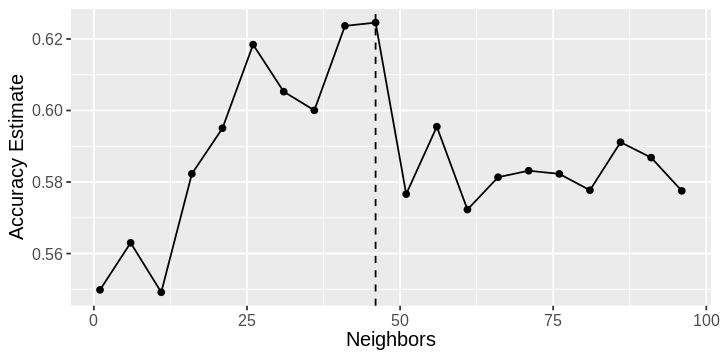

In [40]:
set.seed(9999) 

knn_recipe<-recipe(diagnosis~age+cholesterol, data = heart_data_training) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

knn_model<-nearest_neighbor(weight_func = "rectangular",neighbors = tune())|>
   set_engine("kknn") |>
   set_mode("classification")

knn_vfold <- vfold_cv(heart_data_training,v=10, strata=diagnosis)


k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))
knn_results <- workflow()|>
      add_recipe(knn_recipe)|>
      add_model(knn_model)|>
      tune_grid(resamples = knn_vfold, grid = k_vals) |>
  collect_metrics()
# knn_results


accuracies<-knn_results|>
filter(.metric=="accuracy")

# accuracies


accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  geom_vline(xintercept = 46, linetype = "dashed") +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))


accuracy_vs_k

In [41]:
best_k <- accuracies |>
            arrange(desc(mean)) |>
            slice(1)|>
            select(neighbors)|>
            pull()
best_k

[1] 46

#### We choose "46" as the best K-value

As the graph above shows, we have found the best K-value is 46. We pick the K-value as 46 to have the highest accuracy.\
Now, we re-fit the model and training data with the best K-value.

In [42]:
knn_recipe<-recipe(diagnosis~age+cholesterol, data = heart_data_training) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

knn_model<-nearest_neighbor(weight_func = "rectangular",neighbors = 46)|>
   set_engine("kknn") |>
   set_mode("classification")


final_fit <- workflow()|>
      add_recipe(knn_recipe)|>
      add_model(knn_model)|>
      fit(data=heart_data_training)

prediction<-predict(final_fit,heart_data_testing)|>
bind_cols(heart_data_testing)

prediction

metric_heart_data<-prediction|>
conf_mat(truth=diagnosis,estimate=.pred_class)
metric_heart_data


.pred_class,age,sex,pain_location,restbps,cholesterol,maxbpm,diag_count,diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
TRUE,67,1,4,120,229,129,1,TRUE
FALSE,41,0,2,130,204,172,0,FALSE
TRUE,57,0,4,120,354,163,0,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
TRUE,57,0,4,140,241,123,1,TRUE
TRUE,68,1,4,144,193,141,2,TRUE
TRUE,57,1,4,130,131,115,3,TRUE


          Truth
Prediction FALSE TRUE
     FALSE    27   12
     TRUE     23   30

#### Finally, we got the metrics format above. ###

The precision and recall are the most important things to represent the quality of our classification model. \
Assumption:In this case, we would refer  to observations(people who have heart disease) as positive, and observations(people who are healthy) as negative.

## **Discussion**

**What we have found** \
Our analysis reveals significant predictors for the risk of heart disease. We found that the risk of heart disease increases with age and that individuals with cholesterol levels between 200 and 300 are at a higher risk. Additionally, our results indicate that males are at a higher risk compared to females. Contrary to general perceptions that suggest women may have a higher risk, our data points towards a different trend. The optimal K-value for our model was determined to be 46, suggesting a specific level of model that was most effective for this dataset in predicting heart disease.

**Is this what we expected to find?** \
Our findings partially align with our expectations. 
Compared with past studies, Lloyd-Jones et al. (2003) found for both men and women, patients with higher cholesterol levels have a higher risk of CHD(Coronary heart disease). Jousilahti et al. (1999) found that the risk of CHD increases with age in both sexes.
Previous studies have consistently shown that age and cholesterol are critical factors in heart disease risk (Jousilahti et al., 1999; Lloyd-Jones et al., 2003).\
However, the higher risk in males observed in our study contrasts with some public perceptions and studies suggesting higher cardiovascular risk in women, particularly post-menopause. 
This difference might be due to variations in population, lifestyle, or the specific metrics used in those studies compared to ours.

**What impact could such findings have?**

The implications of our findings could be significant for public health strategies and individual risk assessments. Recognizing that men might have a higher risk than previously considered could lead to earlier and more aggressive interventions in this demographic. Moreover, the identified cholesterol range can refine the thresholds for clinical interventions, potentially leading to better tailored treatments and screening protocols.
Understanding the demographics most at risk can indeed provide valuable insights applicable to a broader population, potentially millions if not billions around the world. This medical research on heart diseases could help us narrow down the key factors which are responsible and develop the necessary technology, and techniques to detect this disease well in advance which may save the lives of those at risk.

**What future questions could this lead to?**

Several questions arise from our study that warrant further investigation. First, understanding why men show higher risk levels in this dataset could lead to insights into gender-specific mechanisms or biases in data collection. Future studies could explore genetic, hormonal, or lifestyle factors that contribute to these differences. Additionally, given the importance of the cholesterol range identified, more research is needed to understand the specific biological impacts within this range.

## **References**
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). *Heart Disease* [Data set]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X. 

Lloyd-Jones, D. M., Wilson, P. W. F., Larson, M. G., Leip, E., Beiser, A., D'Agostino, R. B., Cleeman, J. I., & Levy, D. (2003). Lifetime risk of coronary heart disease by cholesterol levels at selected ages. *Archives of Internal Medicine (1960), 163*(16), 1966-1972. https://doi.org/10.1001/archinte.163.16.1966

Jousilahti, P., Vartiainen, E., Tuomilehto, J., & Puska, P. (1999). Sex, age, cardiovascular risk factors, and coronary heart disease: a prospective follow-up study of 14 786 middle-aged men and women in Finland. *Circulation, 99*(9), 1165–1172. https://doi.org/10.1161/01.cir.99.9.1165